In [1]:
library(caretEnsemble)
library(RColorBrewer)
library(tm)
library(datarium)
library(leaps)
library(glmnet)
library(pls)
library(gam)
library(splines)
library(MVA)
library(nortest)
library(mvnormtest)
library(pastecs)
library(mvtnorm)
library(igraph)
library(dplyr)
library(ggplot2)
library(ggraph)
library(caret)
library(car)
library(mlbench)
library(tidyverse)
library(MASS)
library(ISLR)
library(psych)
library(faraway)
library(pls)
library(Matrix)
library(stats)
library(biotools)
library(ggpubr)
library(broom)
library(leaps)
library(tidyverse)
library(funModeling)
library(Hmisc)
library(rpart)
library(readr)
library(party)
library(partykit)
library(rpart.plot)
library(stringr)
library(reshape2)
library(pROC)
library(corrplot)
library(InformationValue)
library(foreign)
library(nnet)
#install.packages('reshape')
library(reshape)

Loading required package: NLP

Loading required package: Matrix

Loaded glmnet 4.1-2


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


Loading required package: splines

Loading required package: foreach

Loaded gam 1.20


Loading required package: HSAUR2

Loading required package: tools


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:pastecs’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


The following ob

In [2]:
data01 <- read.dta("https://stats.idre.ucla.edu/stat/data/hsbdemo.dta")
head(data01)

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1
2,108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1
3,15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1
4,67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1
5,153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1
6,51,female,high,public,general,42,36,42,31,39,not enrolled,0,1


In [3]:
sum(is.na(data01))

[1] 0

In [4]:
dim(data01)

[1] 200  13

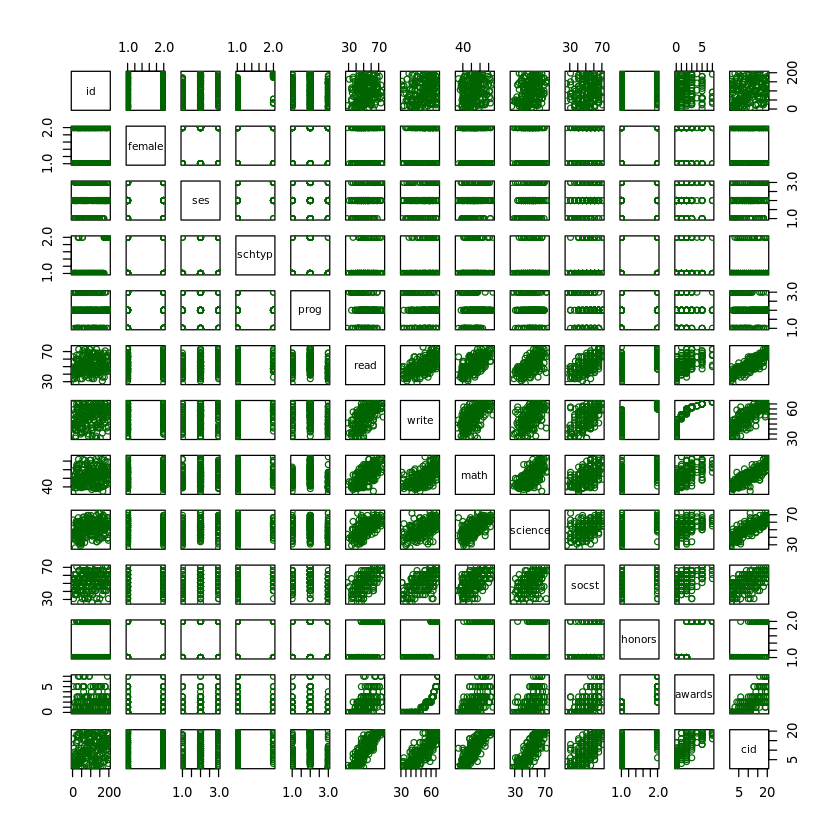

In [5]:
pairs(data01, col = 'darkgreen')

Rows: 200
Columns: 13
$ id      <dbl> 45, 108, 15, 67, 153, 51, 164, 133, 2, 53, 1, 128, 16, 106, 89…
$ female  <fct> female, male, male, male, male, female, male, male, female, ma…
$ ses     <fct> low, middle, high, low, middle, high, middle, middle, middle, …
$ schtyp  <fct> public, public, public, public, public, public, public, public…
$ prog    <fct> vocation, general, vocation, vocation, vocation, general, voca…
$ read    <dbl> 34, 34, 39, 37, 39, 42, 31, 50, 39, 34, 34, 39, 47, 36, 35, 44…
$ write   <dbl> 35, 33, 39, 37, 31, 36, 36, 31, 41, 37, 44, 33, 31, 44, 35, 44…
$ math    <dbl> 41, 41, 44, 42, 40, 42, 46, 40, 33, 46, 40, 38, 44, 37, 40, 39…
$ science <dbl> 29, 36, 26, 33, 39, 31, 39, 34, 42, 39, 39, 47, 36, 42, 51, 34…
$ socst   <dbl> 26, 36, 42, 32, 51, 39, 46, 31, 41, 31, 41, 41, 36, 41, 33, 46…
$ honors  <fct> not enrolled, not enrolled, not enrolled, not enrolled, not en…
$ awards  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ cid     <int> 1,

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


  female frequency percentage cumulative_perc
1 female       109       54.5            54.5
2   male        91       45.5           100.0



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


     ses frequency percentage cumulative_perc
1 middle        95       47.5            47.5
2   high        58       29.0            76.5
3    low        47       23.5           100.0



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


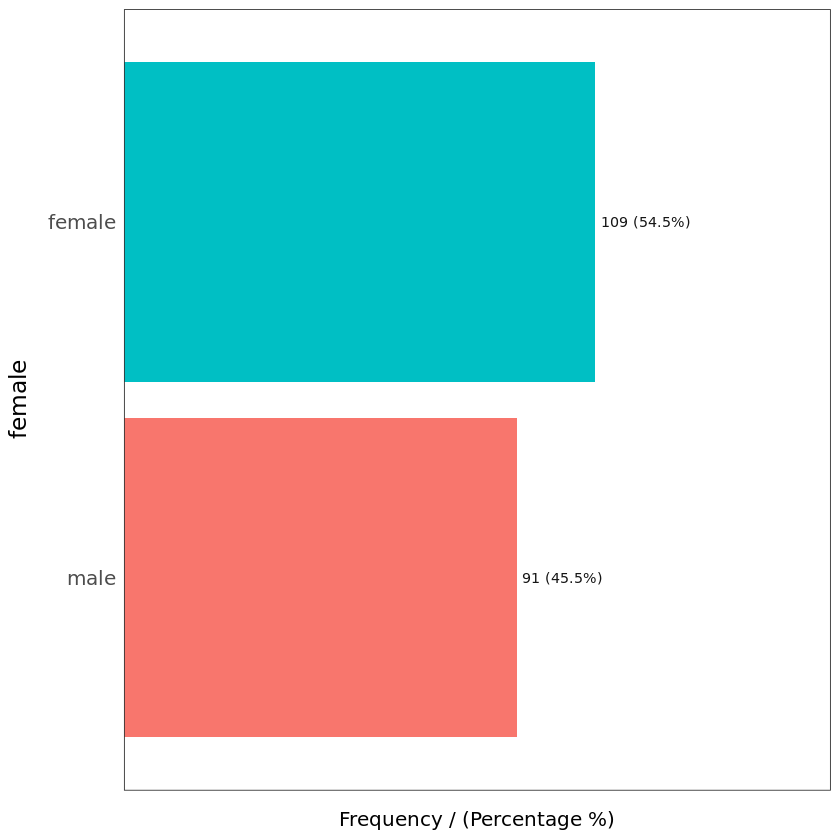

   schtyp frequency percentage cumulative_perc
1  public       168         84              84
2 private        32         16             100



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


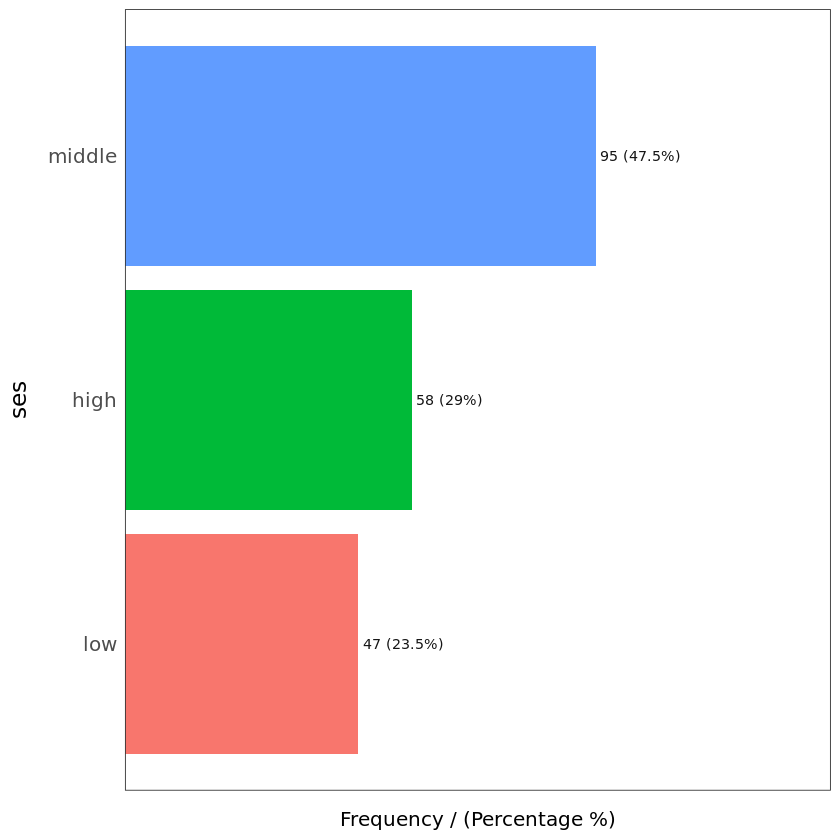

      prog frequency percentage cumulative_perc
1 academic       105       52.5            52.5
2 vocation        50       25.0            77.5
3  general        45       22.5           100.0



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


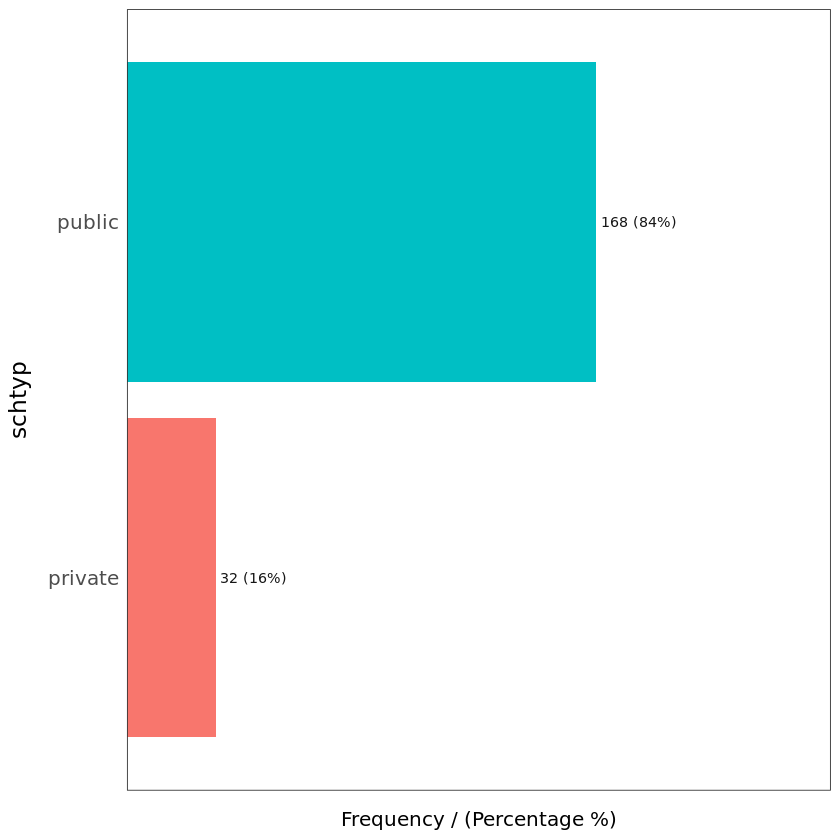

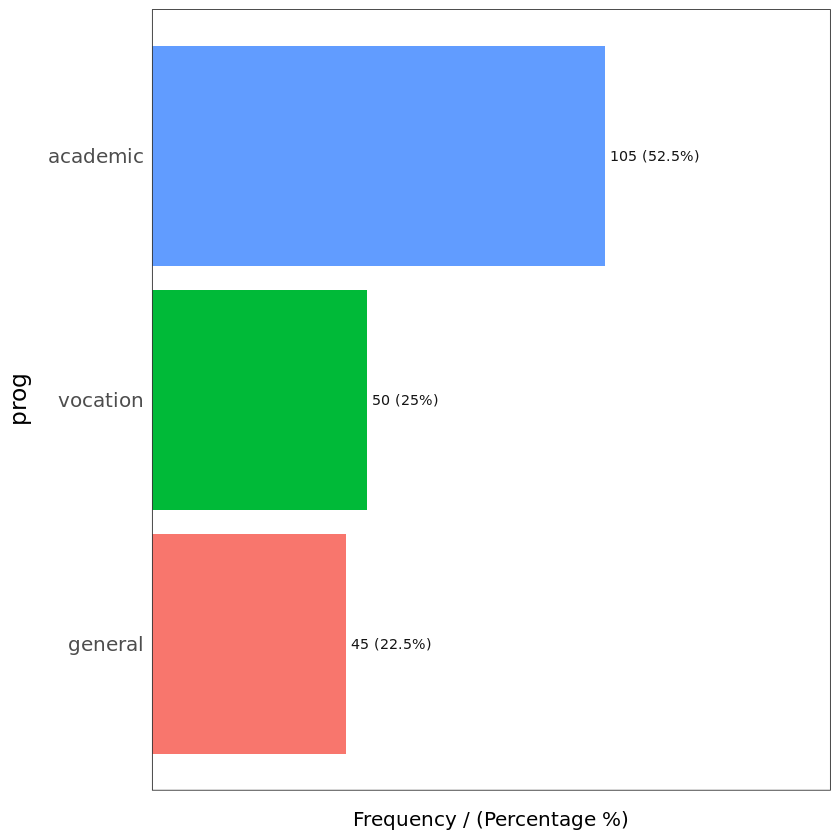

        honors frequency percentage cumulative_perc
1 not enrolled       147       73.5            73.5
2     enrolled        53       26.5           100.0



[1] "Variables processed: female, ses, schtyp, prog, honors"

  variable    mean   std_dev variation_coef  p_01  p_05  p_25  p_50   p_75
1       id 100.500 57.879185      0.5759123  2.99 10.95 50.75 100.5 150.25
2     read  52.230 10.252937      0.1963036 33.97 36.00 44.00  50.0  60.00
3    write  52.775  9.478586      0.1796037 31.00 35.95 45.75  54.0  60.00
4     math  52.645  9.368448      0.1779551 36.98 39.00 45.00  52.0  59.00
5  science  51.850  9.900891      0.1909526 30.98 34.00 44.00  53.0  58.00
6    socst  52.405 10.735793      0.2048620 26.00 31.00 46.00  52.0  61.00
7   awards   1.670  1.818691      1.0890367  0.00  0.00  0.00   1.0   2.00
8      cid  10.430  5.801152      0.5561987  1.00  1.00  5.00  10.5  15.00
    p_95   p_99    skewness kurtosis   iqr       range_98      range_80
1 190.05 198.01  0.00000000 1.799940 99.50 [2.99, 198.01] [20.9, 180.1]
2  68.00  73.03  0.19483729 2.363052 16.00 [33.97, 73.03]    [39, 66.2]
3  65.00  67.00 -0.47841577 2.238527 14.25       [31, 67]      [39, 65]
4  70.05  73.02  0.28441149 2.337319 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


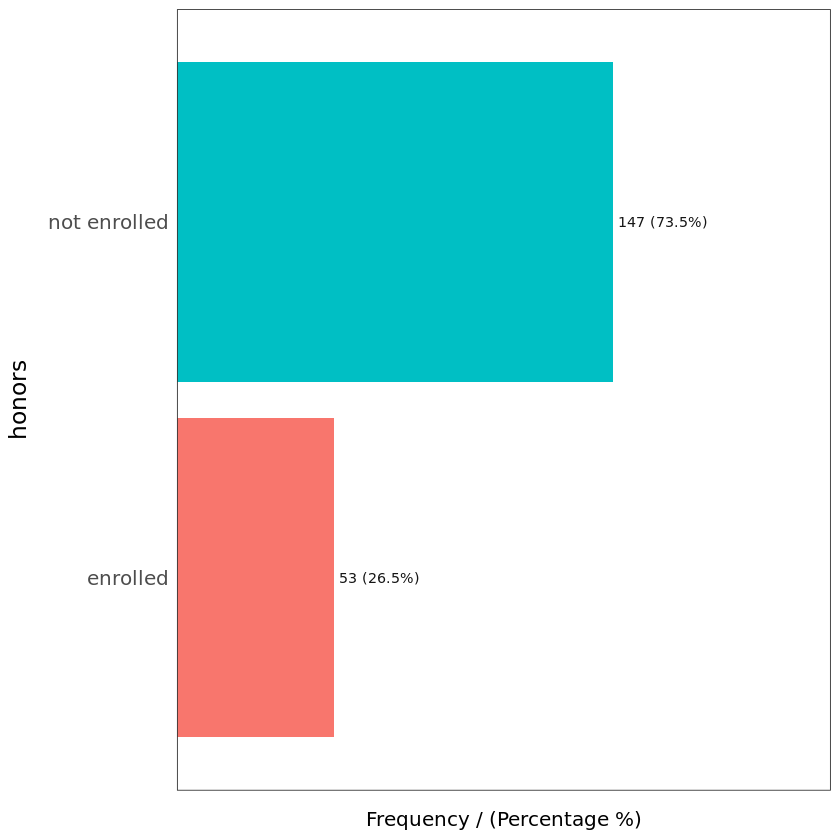

data01 

 13  Variables      200  Observations
--------------------------------------------------------------------------------
id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     200        0      200        1    100.5       67    10.95    20.90 
     .25      .50      .75      .90      .95 
   50.75   100.50   150.25   180.10   190.05 

lowest :   1   2   3   4   5, highest: 196 197 198 199 200
--------------------------------------------------------------------------------
female 
       n  missing distinct 
     200        0        2 
                        
Value        male female
Frequency      91    109
Proportion  0.455  0.545
--------------------------------------------------------------------------------
ses 
       n  missing distinct 
     200        0        3 
                               
Value         low middle   high
Frequency      47     95     58
Proportion  0.235  0.475  0.290
-------------------------------------------------------

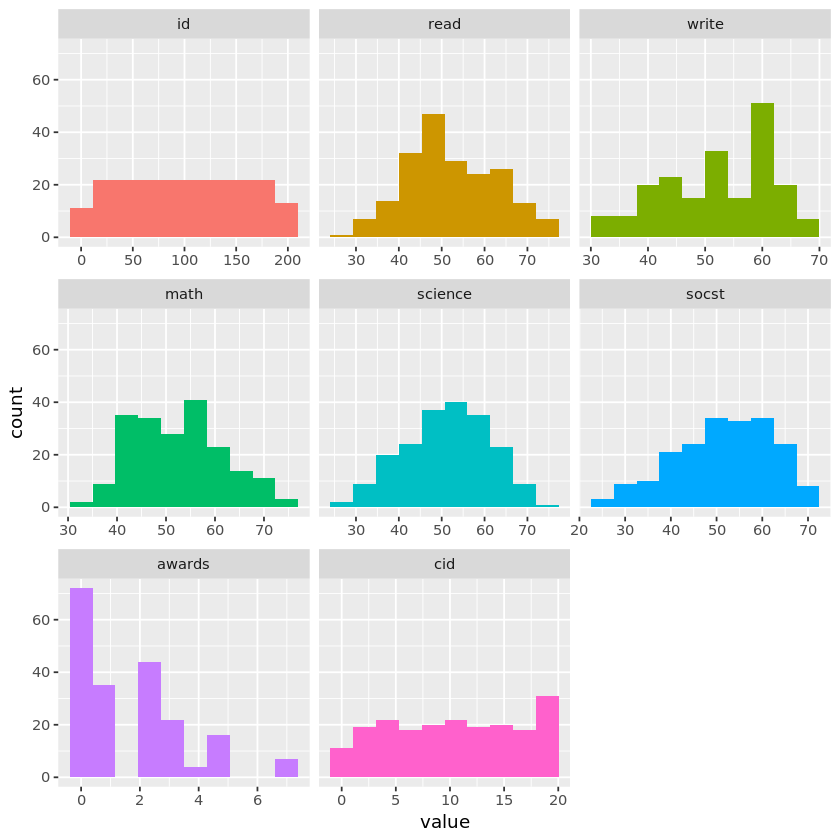

In [6]:
glimpse(data01)
print(status(data01))
freq(data01) 
print(profiling_num(data01))
plot_num(data01)
describe(data01)


In [7]:
CM <- cor(data01[ , 6:10])
CM

,read,write,math,science,socst
read,1.0000000,0.5967765,0.6622801,0.6301579,0.6214843
write,0.5967765,1.0000000,0.6174493,0.5704416,0.6047932
math,0.6622801,0.6174493,1.0000000,0.6307332,0.5444803
science,0.6301579,0.5704416,0.6307332,1.0000000,0.4651060
socst,0.6214843,0.6047932,0.5444803,0.4651060,1.0000000


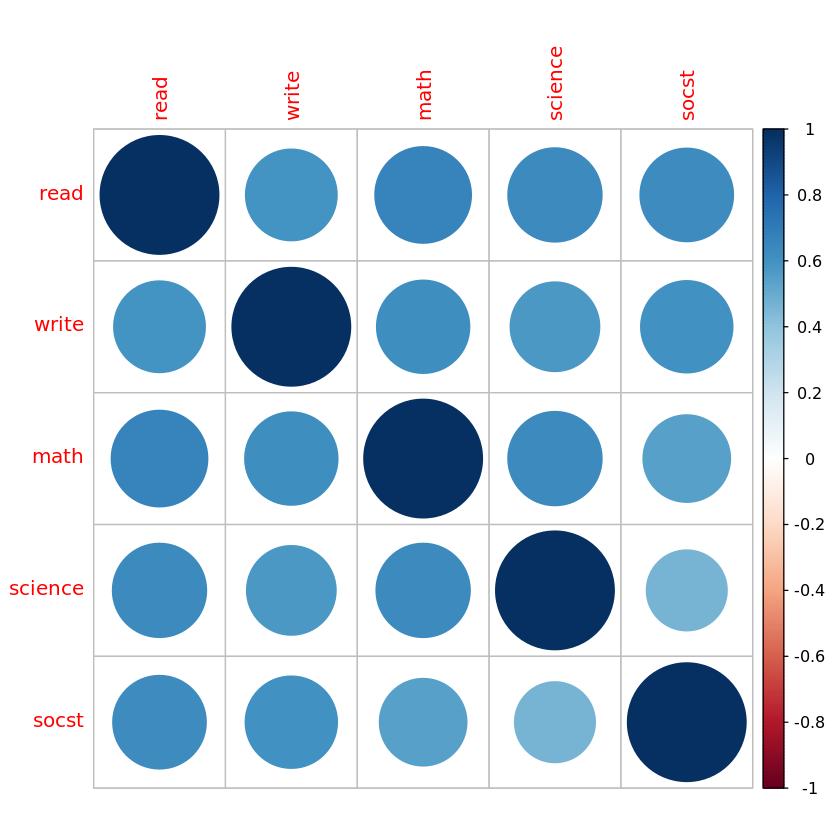

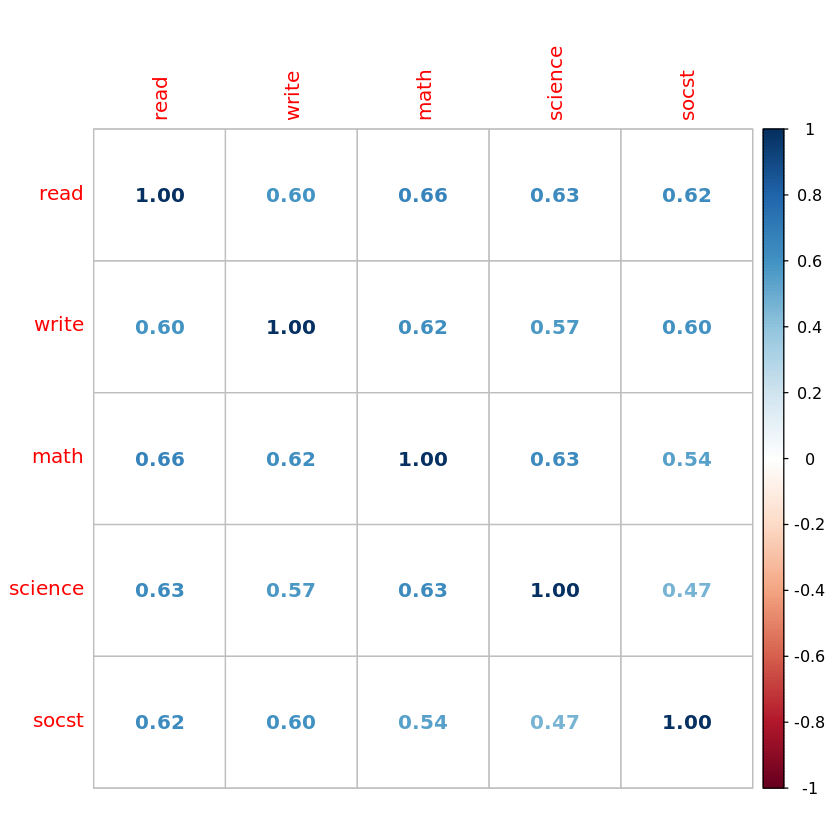

In [50]:
corrplot(CM)
corrplot(CM, 'number')


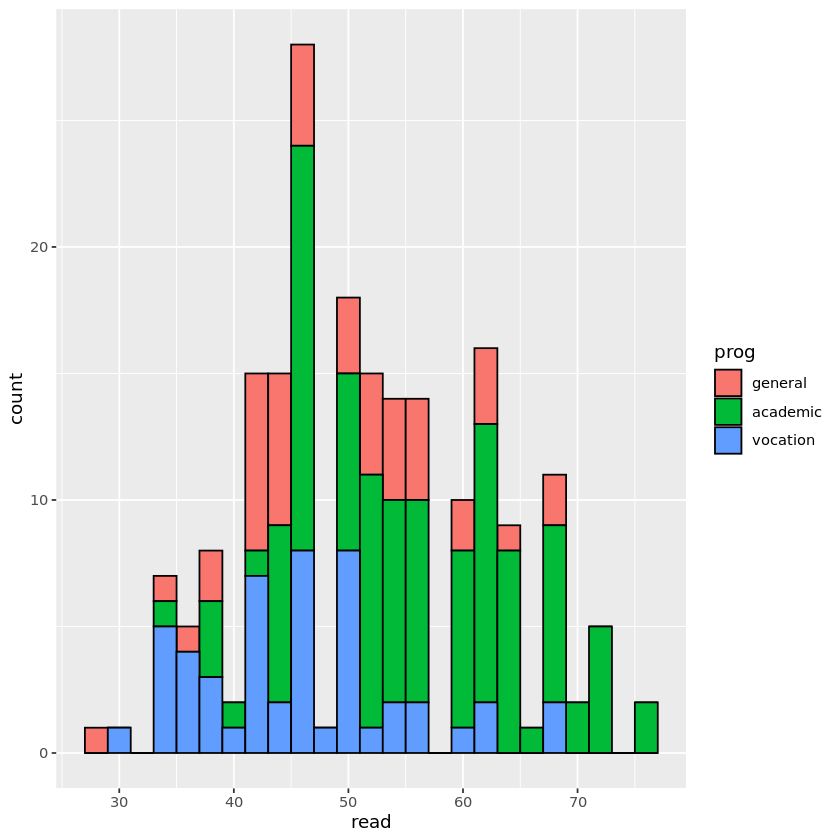

In [9]:
ggplot(data01, aes(read)) +
  geom_histogram(aes(fill = prog), color = "black", binwidth = 2)

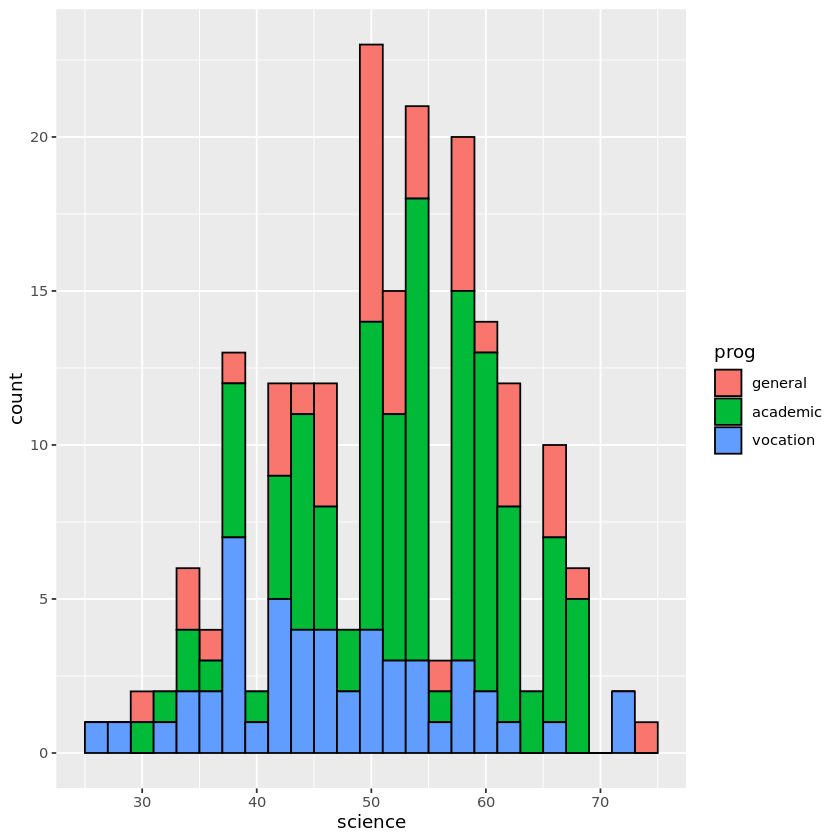

In [10]:
ggplot(data01, aes(science)) +
  geom_histogram(aes(fill = prog), color = "black", binwidth = 2)

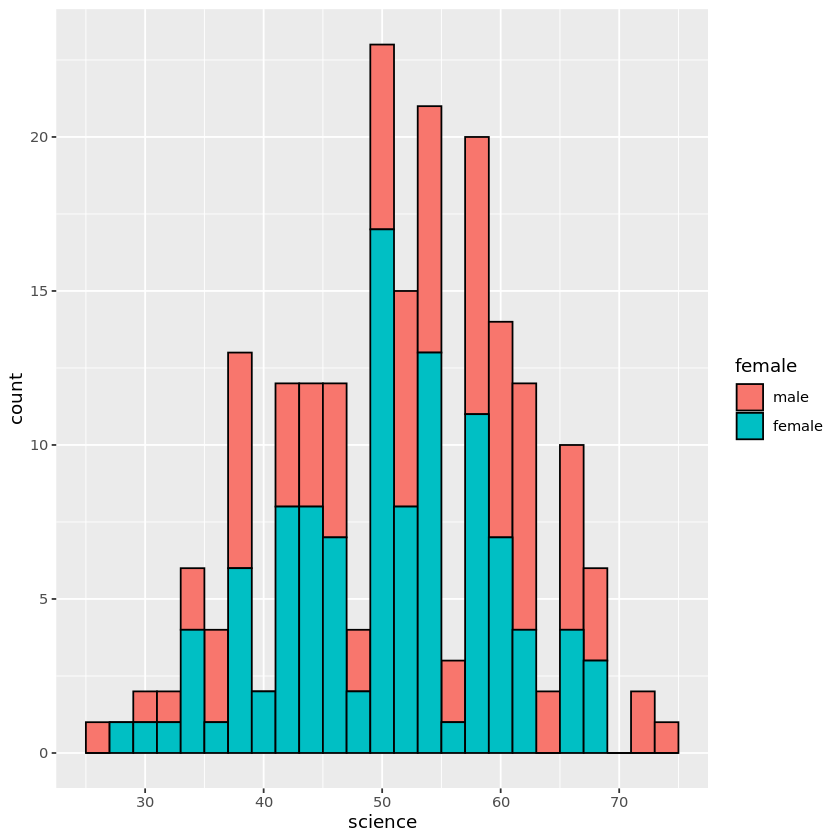

In [11]:
ggplot(data01, aes(science)) +
  geom_histogram(aes(fill = female), color = "black", binwidth = 2)

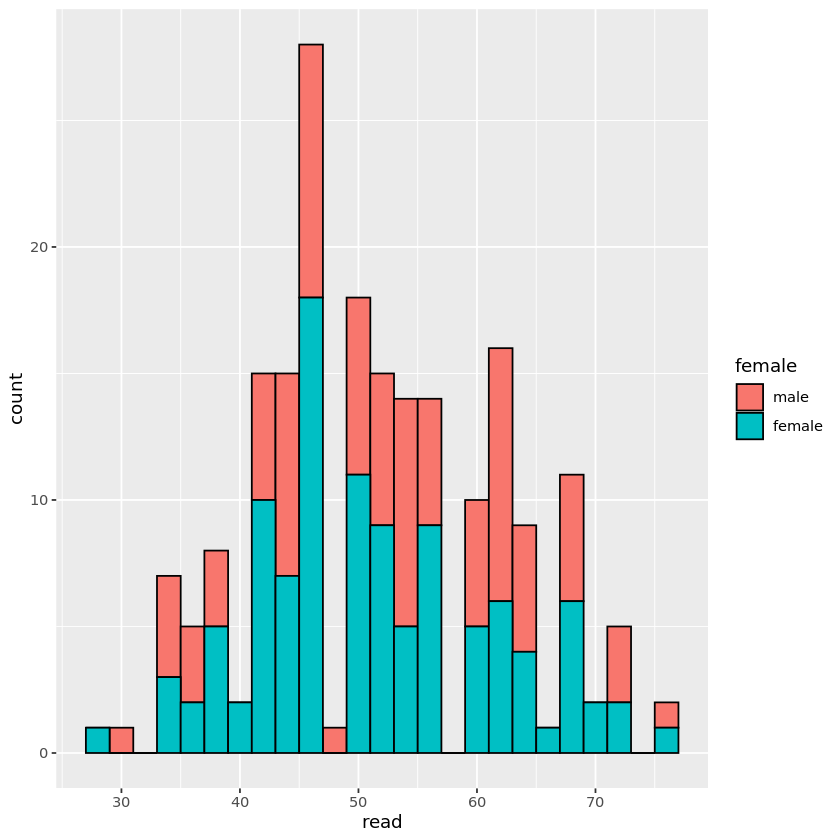

In [12]:
ggplot(data01, aes(read)) +
  geom_histogram(aes(fill = female), color = "black", binwidth = 2)

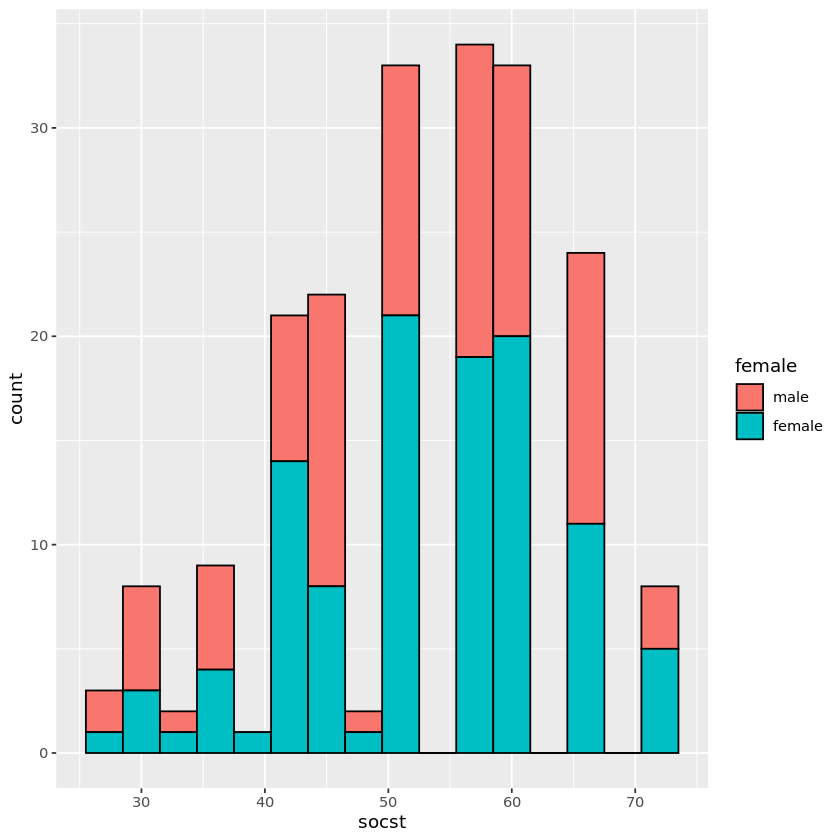

In [13]:
ggplot(data01, aes(socst)) +
  geom_histogram(aes(fill = female), color = "black", binwidth = 3)

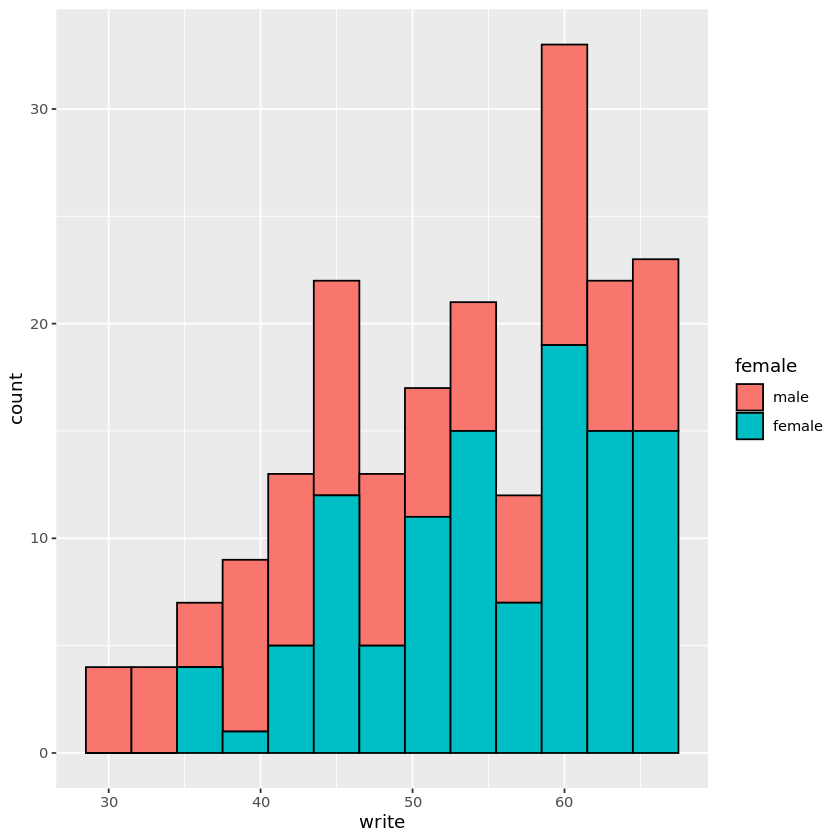

In [14]:
ggplot(data01, aes(write)) +
  geom_histogram(aes(fill = female), color = "black", binwidth = 3)

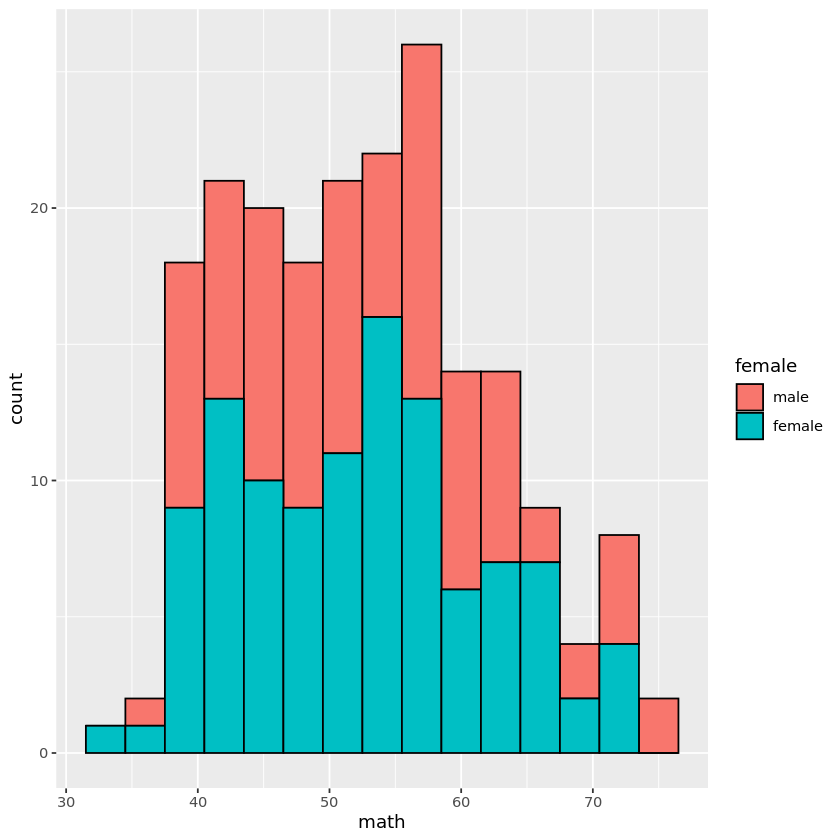

In [15]:
ggplot(data01, aes(math)) +
  geom_histogram(aes(fill = female), color = "black", binwidth = 3)

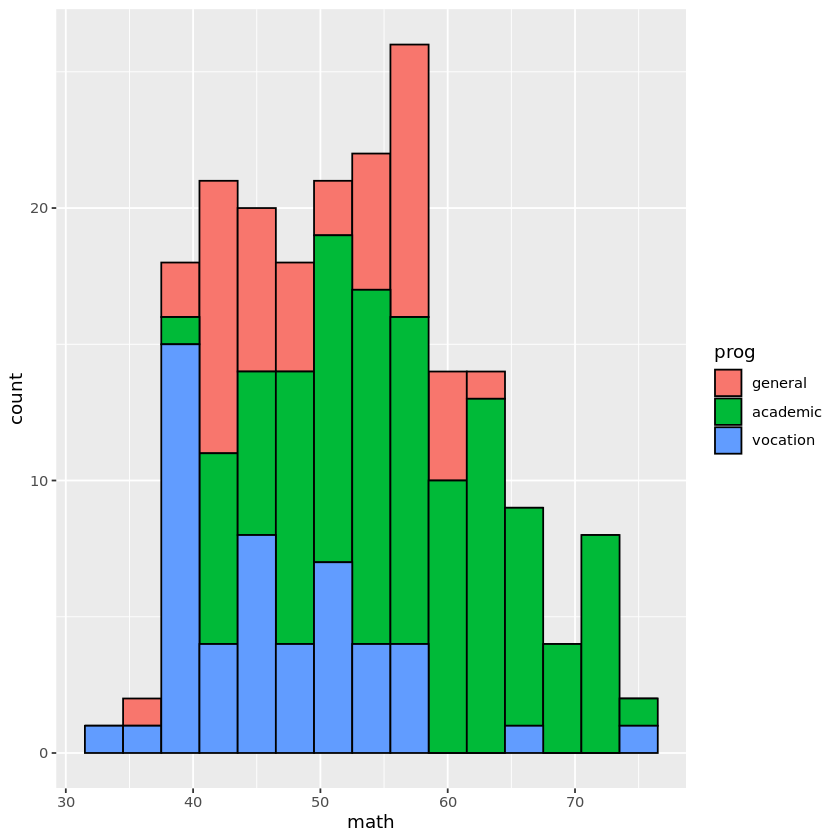

In [16]:
ggplot(data01, aes(math)) +
  geom_histogram(aes(fill = prog), color = "black", binwidth = 3)

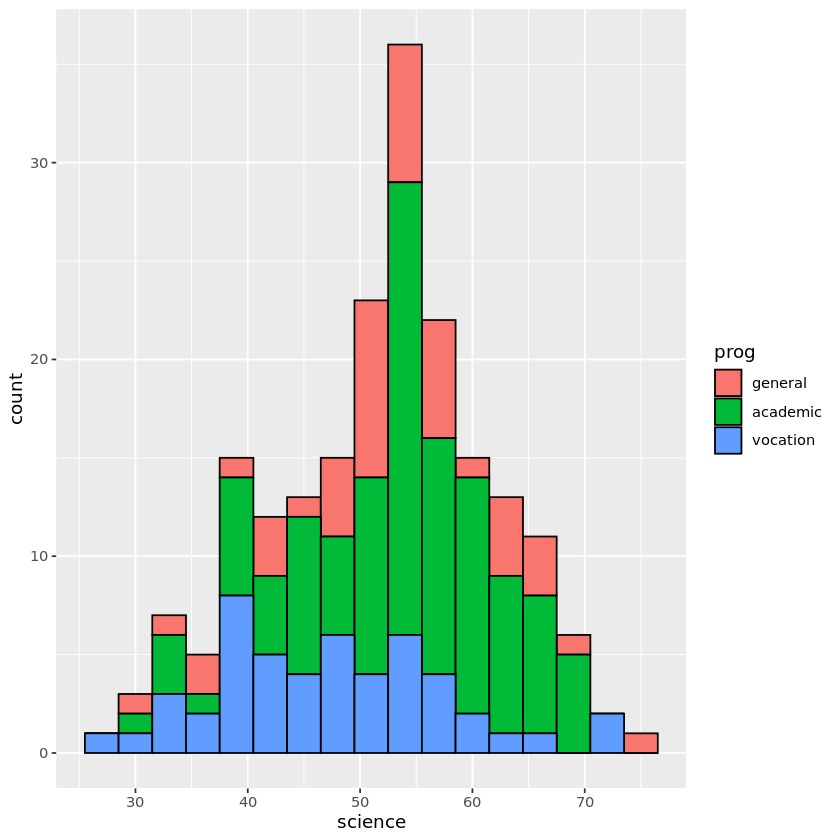

In [17]:
ggplot(data01, aes(science)) +
  geom_histogram(aes(fill = prog), color = "black", binwidth = 3)

In [18]:
names(data01)

[1] "id"      "female"  "ses"     "schtyp"  "prog"    "read"    "write"  
 [8] "math"    "science" "socst"   "honors"  "awards"  "cid"

In [19]:
levels(data01$ses)

[1] "low"    "middle" "high"

In [20]:
summary(data01)

       id            female        ses         schtyp          prog    
 Min.   :  1.00   male  : 91   low   :47   public :168   general : 45  
 1st Qu.: 50.75   female:109   middle:95   private: 32   academic:105  
 Median :100.50                high  :58                 vocation: 50  
 Mean   :100.50                                                        
 3rd Qu.:150.25                                                        
 Max.   :200.00                                                        
      read           write            math          science     
 Min.   :28.00   Min.   :31.00   Min.   :33.00   Min.   :26.00  
 1st Qu.:44.00   1st Qu.:45.75   1st Qu.:45.00   1st Qu.:44.00  
 Median :50.00   Median :54.00   Median :52.00   Median :53.00  
 Mean   :52.23   Mean   :52.77   Mean   :52.65   Mean   :51.85  
 3rd Qu.:60.00   3rd Qu.:60.00   3rd Qu.:59.00   3rd Qu.:58.00  
 Max.   :76.00   Max.   :67.00   Max.   :75.00   Max.   :74.00  
     socst                honors        a

In [21]:
# Proportion of males and females choosing the three different programs:
require(formattable)
mf <- group_by(data01, female, prog) %>% summarise(count=n()) %>%
  group_by(prog) %>% mutate(etotal=sum(count), proportion=round(100*count/etotal,2))


Loading required package: formattable


Attaching package: ‘formattable’


The following object is masked from ‘package:MASS’:

    area


The following object is masked from ‘package:igraph’:

    normalize


`summarise()` has grouped output by 'female'. You can override using the `.groups` argument.



In [22]:
mf

female,prog,count,etotal,proportion
<fct>,<fct>,<int>,<int>,<dbl>
male,general,21,45,46.67
male,academic,47,105,44.76
male,vocation,23,50,46.00
female,general,24,45,53.33
female,academic,58,105,55.24
female,vocation,27,50,54.00


In [23]:
ss <- group_by(data01, ses, female, prog) %>% summarise(count=n()) %>%
  group_by(prog) %>% mutate(etotal=sum(count), proportion=round(100*count/etotal,2))

`summarise()` has grouped output by 'ses', 'female'. You can override using the `.groups` argument.



In [24]:
ss

ses,female,prog,count,etotal,proportion
<fct>,<fct>,<fct>,<int>,<int>,<dbl>
low,male,general,7,45,15.56
low,male,academic,4,105,3.81
low,male,vocation,4,50,8.00
low,female,general,9,45,20.00
low,female,academic,15,105,14.29
low,female,vocation,8,50,16.00
middle,male,general,10,45,22.22
middle,male,academic,22,105,20.95
middle,male,vocation,15,50,30.00


In [25]:
#install.packages('formattable')
library(formattable)
formattable(mf)

female,prog,count,etotal,proportion
<fct>,<fct>,<int>,<int>,<dbl>
male,general,21,45,46.67
male,academic,47,105,44.76
male,vocation,23,50,46.00
female,general,24,45,53.33
female,academic,58,105,55.24
female,vocation,27,50,54.00


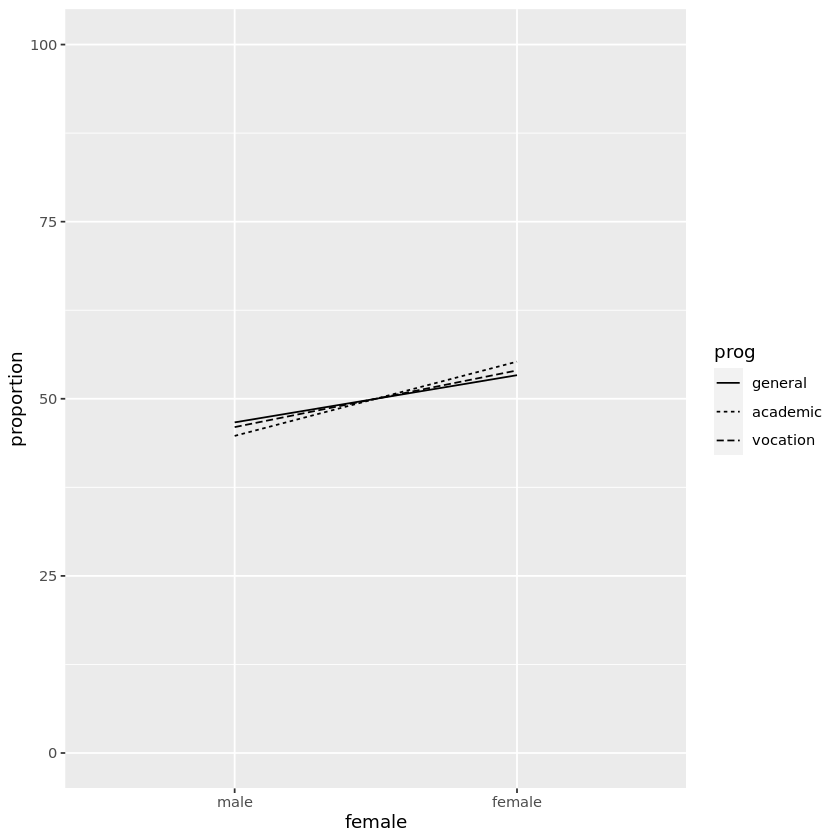

In [26]:
# Visualize the data using GGPLOT:
ggplot(mf, aes(x=female, y=proportion, group=prog, linetype=prog)) +ylim(0,100) + geom_line()

In [27]:
# Visualize the data using DPLYR:
# Proportion by Income Group
readstat <- mutate(data01, readgp=cut_number(read, 8)) %>% group_by(readgp, prog) %>%
  summarise(count=n()) %>% group_by(readgp) %>% 
  mutate(etotal=sum(count), proportion=count/etotal)


`summarise()` has grouped output by 'readgp'. You can override using the `.groups` argument.



In [28]:
readstat

readgp,prog,count,etotal,proportion
<fct>,<fct>,<int>,<int>,<dbl>
"[28,42]",general,11,37,0.29729730
"[28,42]",academic,6,37,0.16216216
"[28,42]",vocation,20,37,0.54054054
"(42,44]",general,7,15,0.46666667
"(42,44]",academic,5,15,0.33333333
"(42,44]",vocation,3,15,0.20000000
"(44,47]",general,4,30,0.13333333
"(44,47]",academic,18,30,0.60000000
"(44,47]",vocation,8,30,0.26666667


In [29]:
formattable(readstat)

readgp,prog,count,etotal,proportion
<fct>,<fct>,<int>,<int>,<dbl>
"[28,42]",general,11,37,0.29729730
"[28,42]",academic,6,37,0.16216216
"[28,42]",vocation,20,37,0.54054054
"(42,44]",general,7,15,0.46666667
"(42,44]",academic,5,15,0.33333333
"(42,44]",vocation,3,15,0.20000000
"(44,47]",general,4,30,0.13333333
"(44,47]",academic,18,30,0.60000000
"(44,47]",vocation,8,30,0.26666667


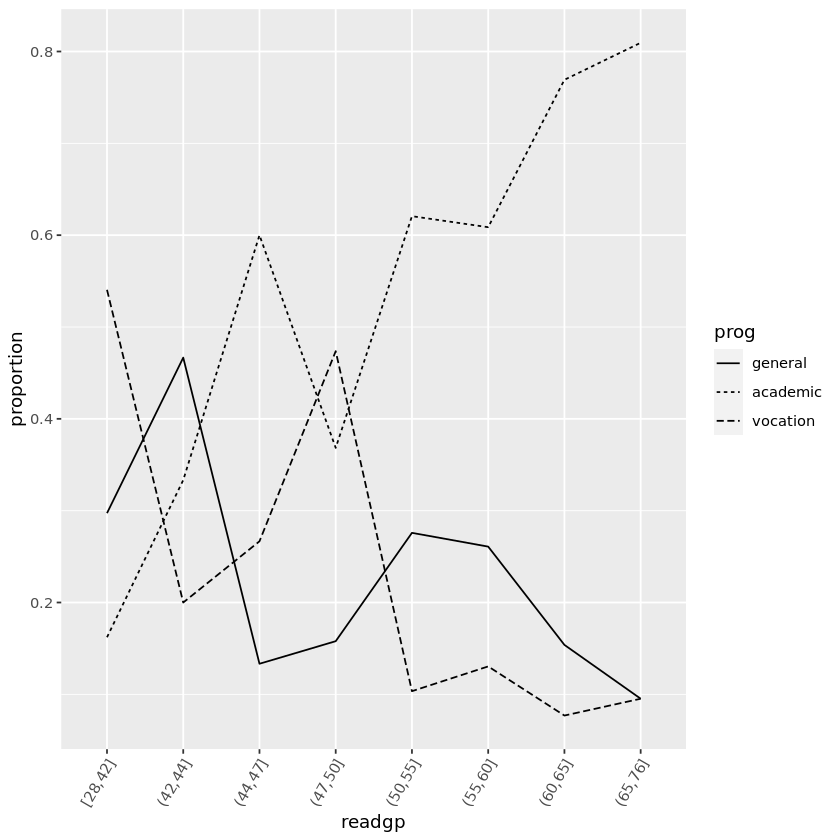

In [30]:
ggplot(readstat, aes(x=readgp, y=proportion, group=prog, linetype=prog)) + geom_line()+ theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [31]:
# Visualize the data using DPLYR:
# Proportion by Income Group
with(data01, table(ses, prog))

        prog
ses      general academic vocation
  low         16       19       12
  middle      20       44       31
  high         9       42        7

In [32]:
with(data01, do.call(rbind, tapply(write, prog, function(x) c(M = mean(x), SD = sd(x)))))

,M,SD
general,51.33333,9.397775
academic,56.25714,7.943343
vocation,46.76000,9.318754


In [33]:
formattable(data01 %>% group_by(prog) %>% summarise(n=n(), M = mean(write), SD = sd(write)))

prog,n,M,SD
<fct>,<int>,<dbl>,<dbl>
general,45,51.33333,9.397775
academic,105,56.25714,7.943343
vocation,50,46.76000,9.318754


In [34]:
# Proportion of students by socio economic status
socstat <- group_by(data01, female, ses, prog) %>% summarise(count=n()) %>%
  group_by(prog) %>% mutate(etotal=sum(count), proportion=round(100*count/etotal,2))


`summarise()` has grouped output by 'female', 'ses'. You can override using the `.groups` argument.



In [35]:
socstat

female,ses,prog,count,etotal,proportion
<fct>,<fct>,<fct>,<int>,<int>,<dbl>
male,low,general,7,45,15.56
male,low,academic,4,105,3.81
male,low,vocation,4,50,8.00
male,middle,general,10,45,22.22
male,middle,academic,22,105,20.95
male,middle,vocation,15,50,30.00
male,high,general,4,45,8.89
male,high,academic,21,105,20.00
male,high,vocation,4,50,8.00


In [36]:
formattable(socstat)

female,ses,prog,count,etotal,proportion
<fct>,<fct>,<fct>,<int>,<int>,<dbl>
male,low,general,7,45,15.56
male,low,academic,4,105,3.81
male,low,vocation,4,50,8.00
male,middle,general,10,45,22.22
male,middle,academic,22,105,20.95
male,middle,vocation,15,50,30.00
male,high,general,4,45,8.89
male,high,academic,21,105,20.00
male,high,vocation,4,50,8.00


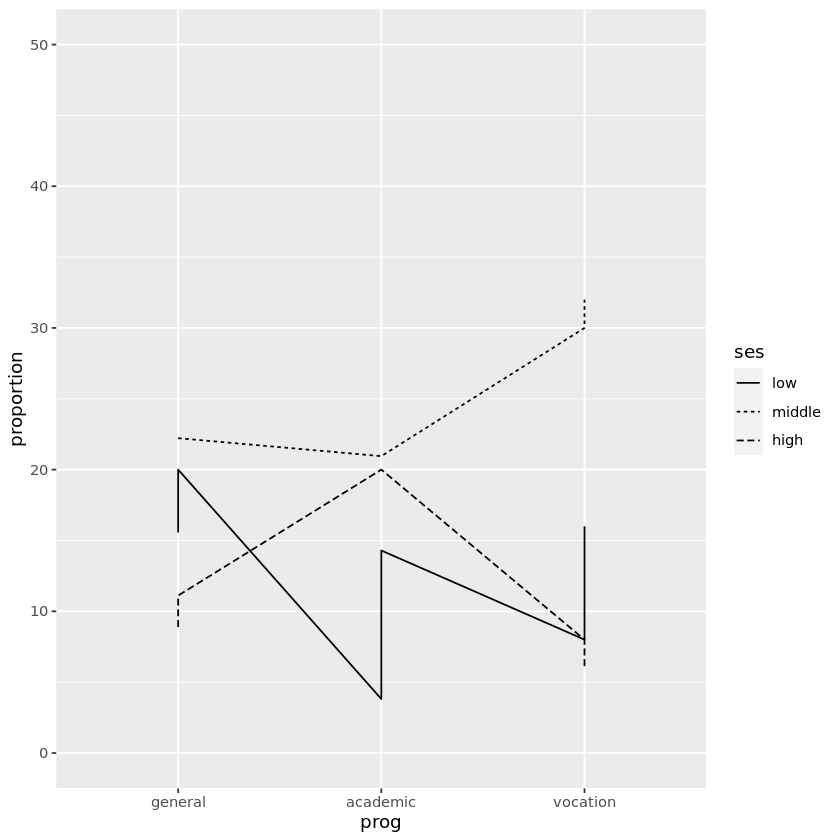

In [37]:
ggplot(socstat, aes(x=prog, y=proportion, group=ses, linetype=ses)) +ylim(0,50) + geom_line()

In [38]:
# fit the Multinomial Model:
# Reference point
data01$prog2 <- relevel(data01$prog, ref = "academic")
data01$prog2

[1] vocation general  vocation vocation vocation general  vocation vocation
  [9] vocation vocation vocation academic vocation vocation vocation general 
 [17] general  vocation academic vocation general  vocation vocation vocation
 [25] academic academic general  general  academic academic general  vocation
 [33] academic academic vocation vocation vocation academic general  academic
 [41] general  academic academic vocation academic vocation vocation general 
 [49] vocation academic academic vocation general  academic academic general 
 [57] academic general  vocation general  vocation academic academic vocation
 [65] vocation vocation general  academic academic general  academic academic
 [73] academic general  vocation general  vocation general  general  academic
 [81] vocation academic academic general  vocation academic general  general 
 [89] general  vocation vocation general  vocation academic vocation general 
 [97] academic vocation vocation general  academic vocation vocation vocation
[105] general  academic general  general  academic academic academic academic
[113] academic academic academic vocation academic academic academic academic
[121] vocation academic academic academic academic academic academic academic
[129] academic academic academic academic general  academic academic general 
[137] academic academic academic academic academic academic general  general 
[145] academic general  general  general  academic academic academic academic
[153] academic vocation general  academic academic academic academic academic
[161] general  general  academic academic academic vocation general  academic
[169] academic general  general  academic academic vocation academic academic
[177] academic academic academic academic academic academic academic general 
[185] academic academic academic academic academic academic academic academic
[193] academic academic academic academic vocation academic academic academic
Levels: academic general vocation

In [39]:
# Fit Multinomial Regression
test <- multinom(prog2 ~ ses + write, data = data01)
summary(test)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 179.982880
final  value 179.981726 
converged


Call:
multinom(formula = prog2 ~ ses + write, data = data01)

Coefficients:
         (Intercept)  sesmiddle    seshigh      write
general     2.852198 -0.5332810 -1.1628226 -0.0579287
vocation    5.218260  0.2913859 -0.9826649 -0.1136037

Std. Errors:
         (Intercept) sesmiddle   seshigh      write
general     1.166441 0.4437323 0.5142196 0.02141097
vocation    1.163552 0.4763739 0.5955665 0.02221996

Residual Deviance: 359.9635 
AIC: 375.9635 

In [51]:
## Fit predictions based on model
data01_probs <- predict (test, data01, "probs") # predict on new data
data01_probs[1:200]
data01_pred <- predict (test, data01)
data01_pred[1:5]
table(data01_pred,data01$prog)

[1] 0.1482764 0.1202017 0.4186747 0.1726885 0.1001231 0.3533566 0.1562562
  [8] 0.1001231 0.2331292 0.1699402 0.2777727 0.2917502 0.1071687 0.2888779
 [15] 0.1482764 0.2777727 0.3126251 0.3293898 0.3293898 0.6324598 0.1998583
 [22] 0.2888779 0.3306609 0.2777727 0.1726885 0.3966333 0.3676935 0.2888779
 [29] 0.2292007 0.3865787 0.2888779 0.1996911 0.2141410 0.3126251 0.2331292
 [36] 0.1998583 0.1202017 0.7921407 0.2292007 0.3504532 0.1001231 0.4852936
 [43] 0.4823541 0.4408612 0.2777727 0.4632141 0.3293898 0.4632141 0.2509706
 [50] 0.3937910 0.2331292 0.2331292 0.2777727 0.5202215 0.4604652 0.3676935
 [57] 0.4630986 0.7657822 0.6102774 0.2917502 0.5049270 0.2160825 0.6876322
 [64] 0.5698425 0.3937910 0.3293898 0.5202215 0.3937910 0.4604652 0.4827571
 [71] 0.7210140 0.5698425 0.4630986 0.4247955 0.5698425 0.4632141 0.4604652
 [78] 0.4604652 0.2888779 0.3293898 0.3676935 0.5049270 0.6876322 0.2777727
 [85] 0.6324598 0.3126251 0.5049270 0.1998583 0.6110367 0.3088400 0.6876322
 [92] 0.7210140 0.5291960 0.4158872 0.6685375 0.6110367 0.4604652 0.4604652
 [99] 0.3293898 0.2331292 0.4604652 0.4604652 0.5268859 0.2331292 0.3937910
[106] 0.5572058 0.4632141 0.5049270 0.6110367 0.5268859 0.6102774 0.5049270
[113] 0.5049270 0.5049270 0.6110367 0.5698425 0.8158376 0.6876322 0.6110367
[120] 0.6685375 0.5752548 0.6110367 0.7200349 0.8158376 0.6110367 0.7921407
[127] 0.6110367 0.6110367 0.7200349 0.7657822 0.6110367 0.6324598 0.3676935
[134] 0.7921407 0.6685375 0.7921407 0.5049270 0.8370332 0.2610484 0.7210140
[141] 0.6876322 0.5202215 0.5698425 0.5698425 0.6500011 0.6685375 0.6685375
[148] 0.6596792 0.5698425 0.7921407 0.6110367 0.8267369 0.7200349 0.6685375
[155] 0.6102774 0.6685375 0.7210140 0.8267369 0.6596792 0.8267369 0.8726772
[162] 0.8559136 0.5752548 0.7921407 0.6110367 0.6110367 0.8559136 0.8267369
[169] 0.8559136 0.7921407 0.5572058 0.8158376 0.6596792 0.8726772 0.8559136
[176] 0.6596792 0.7508140 0.6596792 0.6102774 0.6876322 0.8370332 0.6110367
[183] 0.8559136 0.6110367 0.8726772 0.8726772 0.8043127 0.8726772 0.8267369
[190] 0.5049270 0.8559136 0.8267369 0.6110367 0.8043127 0.8370332 0.8559136
[197] 0.6864017 0.7508140 0.7200349 0.6685375

[1] vocation vocation academic vocation vocation
Levels: academic general vocation

           
data01_pred general academic vocation
   academic      27       92       23
   general        7        4        4
   vocation      11        9       23

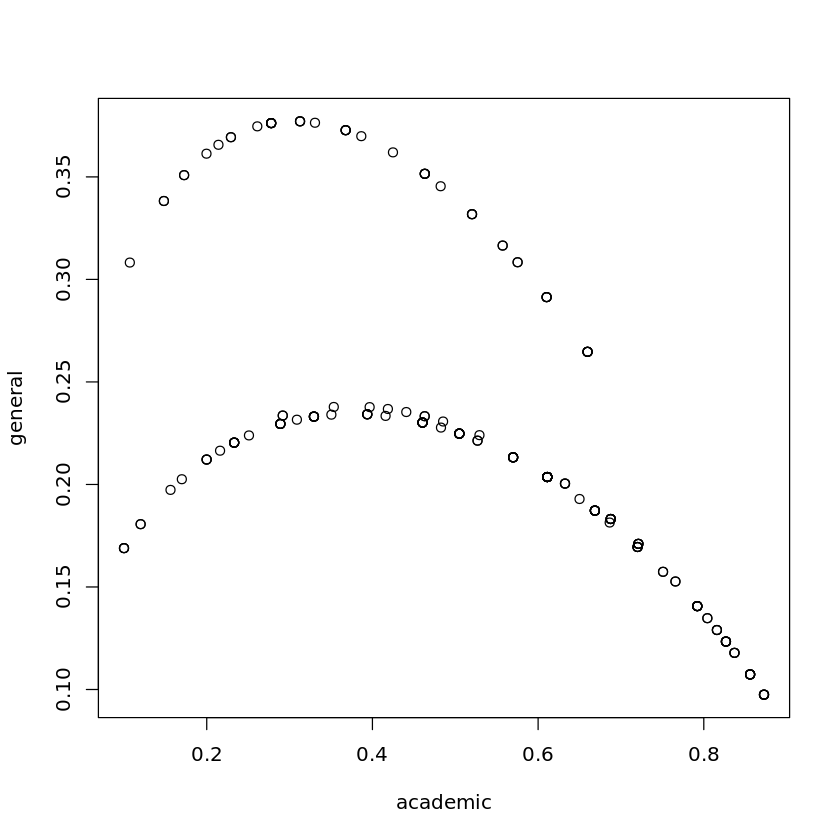

In [57]:
## Visuals for Predictions
plot(data01_probs)

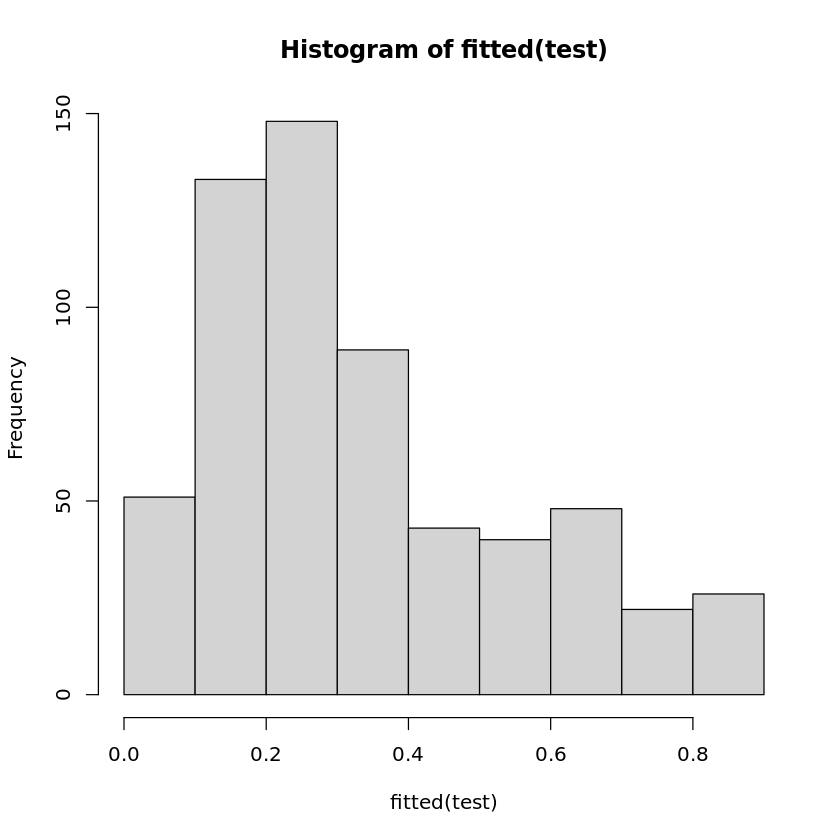

In [53]:
hist(fitted(test))

In [40]:
# Fit Multinomial Regression
test_all <- multinom(prog2 ~ ses + write + read + math + science + socst, data = data01)
summary(test_all)

# weights:  27 (16 variable)
initial  value 219.722458 
iter  10 value 181.523639
iter  20 value 159.901319
final  value 159.901300 
converged


Call:
multinom(formula = prog2 ~ ses + write + read + math + science + 
    socst, data = data01)

Coefficients:
         (Intercept)  sesmiddle    seshigh       write        read        math
general     4.441175 -0.4075732 -1.0154317 -0.02638071 -0.04451857 -0.09692786
vocation    9.239398  0.8510902 -0.3106137 -0.03414681 -0.03452593 -0.11706045
            science       socst
general  0.09983693 -0.02169398
vocation 0.05430606 -0.07079844

Std. Errors:
         (Intercept) sesmiddle   seshigh      write       read       math
general     1.520336  0.492940 0.5762707 0.03009256 0.03011511 0.03359206
vocation    1.678261  0.546589 0.6639833 0.03019865 0.03345737 0.03683209
            science      socst
general  0.03020831 0.02622514
vocation 0.03105560 0.02737621

Residual Deviance: 319.8026 
AIC: 351.8026 

In [54]:
SUMscore <- data01$read + data01$write + data01$math + data01$science + data01$socst
SUMscore
test_sc <- multinom(prog2 ~ SUMscore, data = data01)
summary(test_sc)

[1] 165 180 190 181 200 190 198 186 196 187 198 198 194 200 194 207 212 208
 [19] 200 220 206 211 218 199 215 216 223 224 215 225 211 201 206 216 201 222
 [37] 212 227 217 228 228 239 219 225 227 220 240 215 231 231 236 221 232 239
 [55] 234 240 240 226 234 220 236 246 251 241 244 239 237 255 250 237 248 237
 [73] 253 254 258 253 253 254 245 260 236 241 256 241 248 268 264 250 265 255
 [91] 241 253 263 266 239 264 270 266 271 262 271 266 272 243 254 279 265 265
[109] 275 265 276 268 273 269 264 265 280 270 276 272 258 288 278 253 268 283
[127] 284 276 286 287 297 282 273 293 273 289 295 275 274 291 291 287 288 283
[145] 288 294 299 284 274 290 285 297 297 287 287 278 294 295 295 305 300 307
[163] 308 293 314 304 310 310 307 312 292 312 304 305 311 306 321 323 313 317
[181] 317 308 323 325 326 327 327 332 327 329 334 325 320 336 332 339 339 340
[199] 330 343

# weights:  9 (4 variable)
initial  value 219.722458 
iter  10 value 176.619114
iter  10 value 176.619114
final  value 176.619114 
converged


Call:
multinom(formula = prog2 ~ SUMscore, data = data01)

Coefficients:
         (Intercept)    SUMscore
general     4.191407 -0.01886820
vocation    8.645141 -0.03679921

Std. Errors:
         (Intercept)    SUMscore
general     1.367874 0.005157952
vocation    1.505506 0.006007857

Residual Deviance: 353.2382 
AIC: 361.2382 

In [55]:
step(test)

Start:  AIC=375.96
prog2 ~ ses + write

trying - ses 
# weights:  9 (4 variable)
initial  value 219.722458 
final  value 185.510837 
converged
trying - write 
# weights:  12 (6 variable)
initial  value 219.722458 
iter  10 value 195.705189
iter  10 value 195.705188
iter  10 value 195.705188
final  value 195.705188 
converged
        Df      AIC
<none>   8 375.9635
- ses    4 379.0217
- write  6 403.4104


Call:
multinom(formula = prog2 ~ ses + write, data = data01)

Coefficients:
         (Intercept)  sesmiddle    seshigh      write
general     2.852198 -0.5332810 -1.1628226 -0.0579287
vocation    5.218260  0.2913859 -0.9826649 -0.1136037

Residual Deviance: 359.9635 
AIC: 375.9635 

In [41]:
stepwise_model <- test_all %>% stepAIC(trace = FALSE)
coef(stepwise_model)

# weights:  21 (12 variable)
initial  value 219.722458 
iter  10 value 173.294170
final  value 164.975567 
converged
# weights:  24 (14 variable)
initial  value 219.722458 
iter  10 value 184.270328
iter  20 value 160.624525
final  value 160.624514 
converged
# weights:  24 (14 variable)
initial  value 219.722458 
iter  10 value 189.441467
iter  20 value 161.107834
final  value 161.107830 
converged
# weights:  24 (14 variable)
initial  value 219.722458 
iter  10 value 192.869507
iter  20 value 167.071479
iter  20 value 167.071479
iter  20 value 167.071479
final  value 167.071479 
converged
# weights:  24 (14 variable)
initial  value 219.722458 
iter  10 value 193.222859
iter  20 value 165.985643
final  value 165.985637 
converged
# weights:  24 (14 variable)
initial  value 219.722458 
iter  10 value 187.735608
iter  20 value 163.564115
final  value 163.564109 
converged
# weights:  24 (14 variable)
initial  value 219.722458 
iter  10 value 184.270328
iter  20 value 160.624525
final  v

,(Intercept),sesmiddle,seshigh,math,science,socst
general,3.925130,-0.3251216,-0.9441242,-0.1184824,0.08012764,-0.04237059
vocation,8.745662,0.9667470,-0.2018126,-0.1386983,0.03516103,-0.09091674


In [42]:
summary(stepwise_model)

Call:
multinom(formula = prog2 ~ ses + math + science + socst, data = data01)

Coefficients:
         (Intercept)  sesmiddle    seshigh       math    science       socst
general     3.925130 -0.3251216 -0.9441242 -0.1184824 0.08012764 -0.04237059
vocation    8.745662  0.9667470 -0.2018126 -0.1386983 0.03516103 -0.09091674

Std. Errors:
         (Intercept) sesmiddle   seshigh       math    science      socst
general     1.458433 0.4871833 0.5701258 0.03162876 0.02751602 0.02324095
vocation    1.616630 0.5410576 0.6563785 0.03494488 0.02794217 0.02471268

Residual Deviance: 324.0381 
AIC: 348.0381 

In [56]:
test_pred <- fitted(test)
test_pred
head(test_pred)

,academic,general,vocation
1,0.1482764,0.3382454,0.5134781
2,0.1202017,0.1806283,0.6991700
3,0.4186747,0.2368082,0.3445171
4,0.1726885,0.3508384,0.4764731
5,0.1001231,0.1689374,0.7309395
6,0.3533566,0.2377976,0.4088458
7,0.1562562,0.1973504,0.6463934
8,0.1001231,0.1689374,0.7309395
9,0.2331292,0.2203976,0.5464732
10,0.1699402,0.2025531,0.6275067


,academic,general,vocation
1,0.1482764,0.3382454,0.5134781
2,0.1202017,0.1806283,0.6991700
3,0.4186747,0.2368082,0.3445171
4,0.1726885,0.3508384,0.4764731
5,0.1001231,0.1689374,0.7309395
6,0.3533566,0.2377976,0.4088458


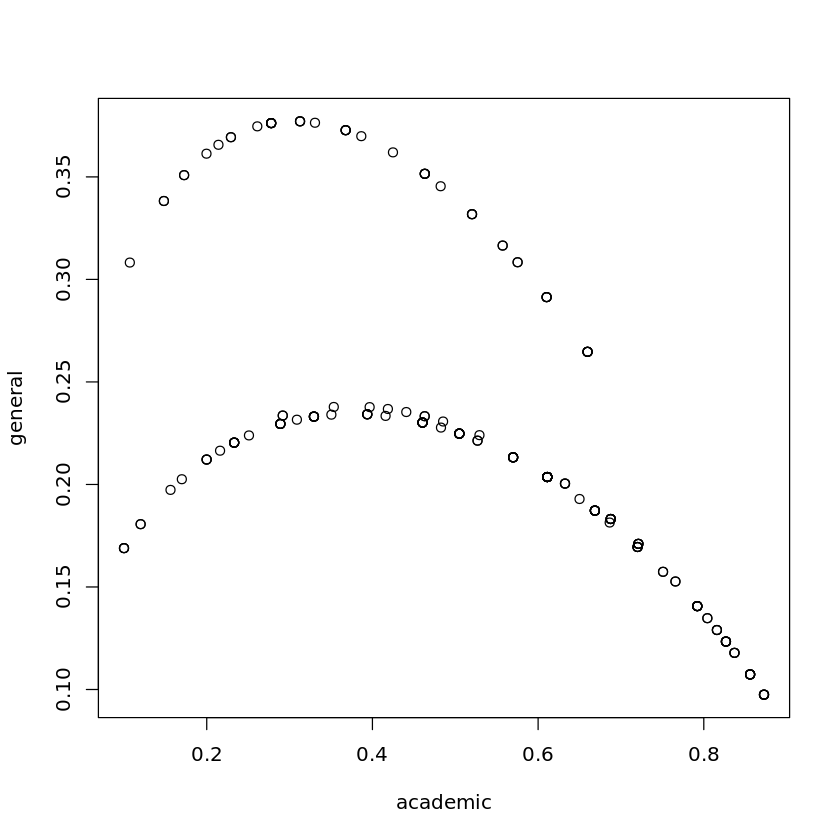

In [59]:
plot(test_pred)

In [43]:
# continuous predictor variable write within each level of ses
dwrite <- data.frame(ses = rep(c("low", "middle", "high"), each = 41), write = rep(c(30:70),3))

In [44]:
# store the predicted probabilities for each value of ses and write
pp_write <- cbind(dwrite, predict(test, newdata = dwrite, type = "probs", se = TRUE))


In [45]:
## calculate the mean probabilities within each level of ses
by(pp_write[, 3:5], pp_write$ses, colMeans)

pp_write$ses: high
 academic   general  vocation 
0.6164315 0.1808037 0.2027648 
------------------------------------------------------------ 
pp_write$ses: low
 academic   general  vocation 
0.3972977 0.3278174 0.2748849 
------------------------------------------------------------ 
pp_write$ses: middle
 academic   general  vocation 
0.4256198 0.2010864 0.3732938 

In [46]:
## melt data set to long for ggplot2
long_pp <- melt(pp_write, id.vars = c("ses", "write"), value.name = "probability")
long_pp

ses,write,variable,value
<chr>,<int>,<fct>,<dbl>
low,30,academic,0.09843588
low,31,academic,0.10716868
low,32,academic,0.11650390
low,33,academic,0.12645834
low,34,academic,0.13704576
low,35,academic,0.14827643
low,36,academic,0.16015670
low,37,academic,0.17268854
low,38,academic,0.18586924


In [47]:
names(long_pp)[names(long_pp) == "value"] <- "probability"
head(long_pp)

,ses,write,variable,probability
,<chr>,<int>,<fct>,<dbl>
1,low,30,academic,0.09843588
2,low,31,academic,0.10716868
3,low,32,academic,0.11650390
4,low,33,academic,0.12645834
5,low,34,academic,0.13704576
6,low,35,academic,0.14827643


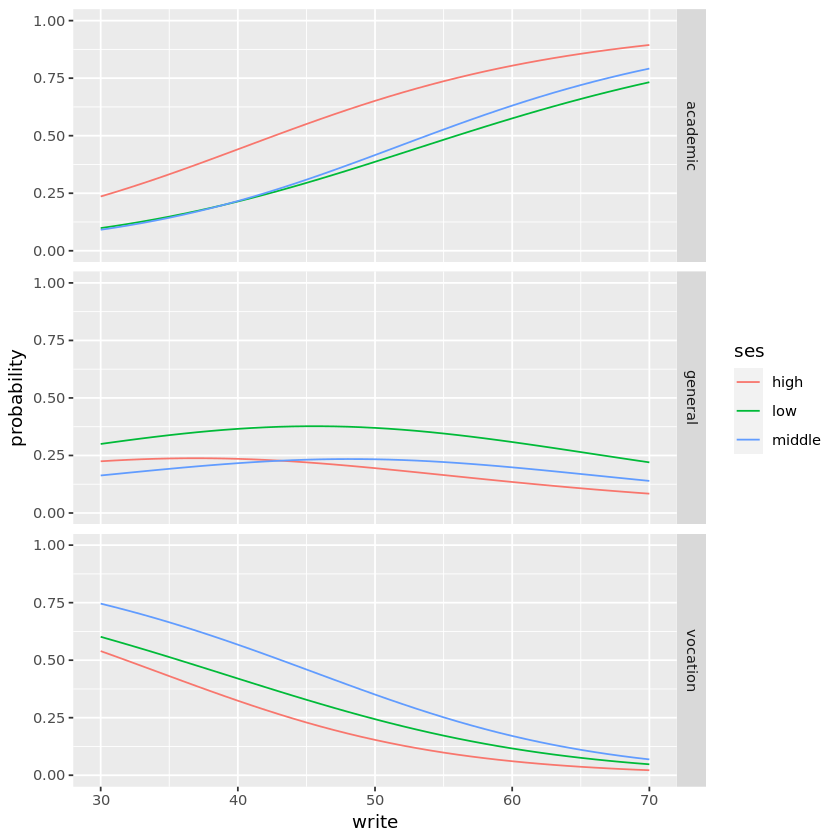

In [48]:
## plot predicted probabilities across write values for each level of ses
ggplot(long_pp, aes(x = write, y = probability, colour = ses)) + geom_line() + facet_grid(variable ~., scales = "free") + ylim(0,1)